# Advanced pangaeapy usage: Spectral analysis

Identifying cyclicity or frequencies within a given data set is a frequent task for many scientific disciplines. In this example we will try to identify frequencies within a 'classic' data set, the SPECMAP stacked oxygen isotope composite data set published by Imbrie et al (1989, https://doi.org/10.1007/978-94-009-2446-8_7).

In this data set frequencies of orbital forcing (100, 41,23 ka) should be detectable. This data set is archived in PANGAEA so lets take a look...

Imbrie, John D; McIntyre, Andrew; Mix, Alan C (1989): Oceanic response to orbital forcing in the late Quaternary: observational and experimental strategies. In: Berger, A; Schneider, S H & Duplessy, J C (eds.), Climate and Geosciences, A Challenge for Science and Society in the 21th Century. Boston (Kluwer Academic), 121-164,

In [1]:
from pangaeapy import PanDataSet
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks, peak_prominences
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

ds=PanDataSet(441706)

First lets plot the data set to get a first impression of the data.

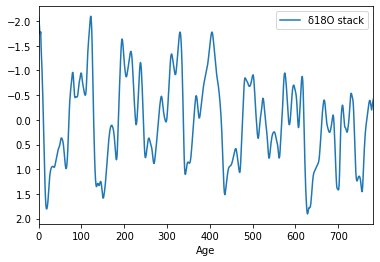

In [2]:
ds.data.plot(x='Age', y='δ18O stack')
plt.gca().invert_yaxis()
plt.show()

To perform a good spectral analysis we need to roughly know the frequency spectrum of our sample. For SPECMAP we know that there are significant cycles between 20 and 400 ka. The time series max age is about 800ka which defines the max 'cycle'.
Frequency SI unit is s-1 (per second or time unit).  This means we have to investigate frequencies between 0.00125 (1/800) and 0.05 (1/20), unit of frequencies is ka-1.

For the lombscargle analysis we need these frequencies as input. We use numpy's linspace to define a list of some hundred frequencies between 0.00125 and 0.05 we'll use for our computations.

We now perform the spectral analysis with astropy's LombScargle and we can receive the power spectrum for our frequencies defined above using astropy's 'power' method.

To avoid visual determination of peaks within the power spectrum, we use scipy's find_peaks method which returns a list of peaks. Here we define a minimum height of peaks of 0.05. In addition we determine the prominence or height of each peak using scipy's peak_prominence method.

In [14]:
f = np.linspace(0.00125, 0.05, 200)
ls=LombScargle(ds.data['Age'], ds.data['δ18O stack'])
power = ls.power(f)
peaks, peak_heights = find_peaks(power,height=0.05)
prominences = peak_prominences(power, peaks)[0]

Now we can plot the result.
First we plot the power spectrum against the frequencies we defined.
In addition we plot the peaks we identified as orange circles. The prominance is indicated as a black line at each peak.
Voila..

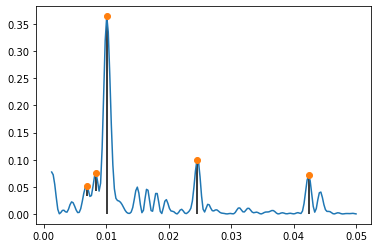

In [15]:
plt.plot(f, power) 
plt.plot(f[peaks], power[peaks], "o") 
contour_heights = power[peaks] - prominences
plt.vlines(x=f[peaks], ymin=contour_heights, ymax=power[peaks])
plt.show()

To identify the frequency of peaks we simply calculate:

In [16]:
1/f[peaks]

array([145.25547445, 119.69924812,  99.31378665,  40.77868852,
        23.5816916 ])

And we see a number of prominent frequencies. 
To identify the most important ones, we can put frequencies and their prominences into a pandas dataframe.

The three most prominent frequencies are at about 99.3ka, 40.7ka and 23.6ka. Which represent the eccentricity (100ka), obliquity () and precession cycles more or less. Not bad..

In [7]:
powerpeaks=pd.DataFrame({'peak':peaks,'promi':prominences,'ka':1/f[peaks]})
powerpeaks=powerpeaks.sort_values('promi', ascending=False)
powerpeaks.head(3)

,peak,promi,ka
2,54,0.363333,99.459459
3,143,0.100642,40.707965
4,252,0.071129,23.620026
